In [11]:
from IPython.display import clear_output

In [12]:
# Install the necessary packages
%pip install numpy matplotlib scikit-learn

clear_output()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Basic Liner Regression

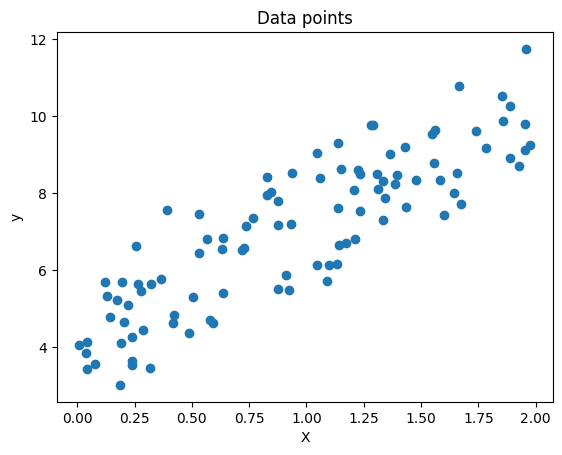

In [14]:
# Generate some data points along a line with some noise
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data points
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data points")
plt.show()


Intercept: [4.32235853]
Coefficient: [2.93647151]
Mean Squared Error: 1.0434333815695171


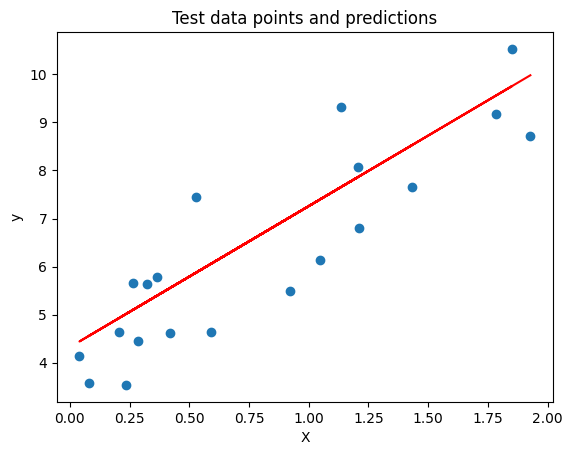

In [15]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print the model's coefficients
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_[0]}")

# Evaluate the model
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the test data points and the predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test data points and predictions")
plt.show()

### Code Explanation:
1. **Data Generation**:
   - Simulates three real-world datasets with added random noise for variability.

2. **Linear Regression**:
   - Implements regression manually using the normal equation: 
     \[
     w = (X^T X)^{-1} X^T y
     \]
   This finds the slope and intercept of the best-fit line.

3. **Metrics Calculation**:
   - Mean Squared Error (MSE): Measures average squared differences between predictions and actual values.
   - Mean Absolute Error (MAE): Measures average absolute differences.
   - R-squared (R²): Indicates how well the model fits the data.

4. **Plots**:
   - Scatter plots for raw data.
   - A line showing the hypothesis.


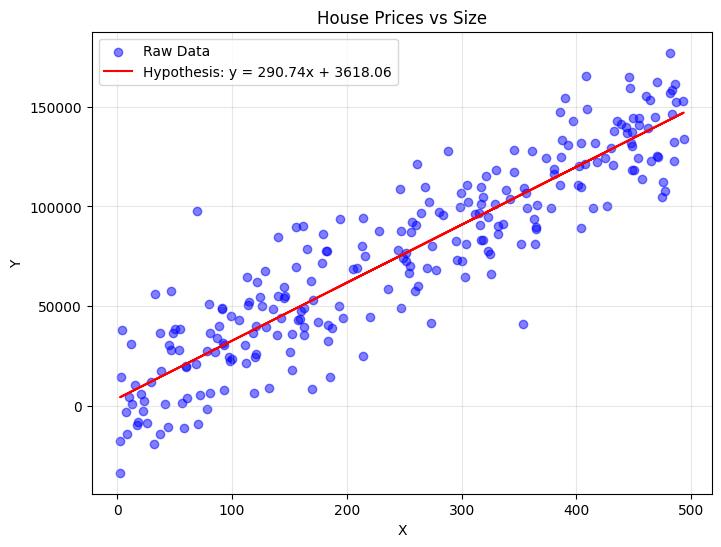

Metrics for House Prices vs Size:
Mean Squared Error (MSE): 392377931.96
Mean Absolute Error (MAE): 15843.01
R-squared (R2): 0.83




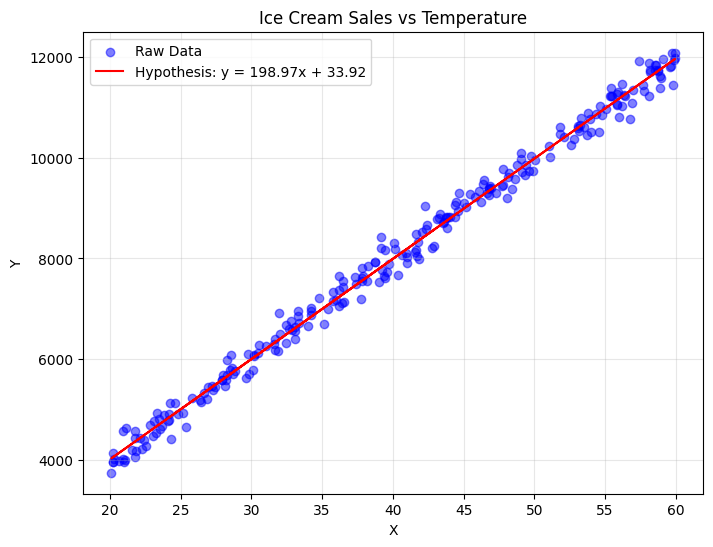

Metrics for Ice Cream Sales vs Temperature:
Mean Squared Error (MSE): 39176.12
Mean Absolute Error (MAE): 156.10
R-squared (R2): 0.99




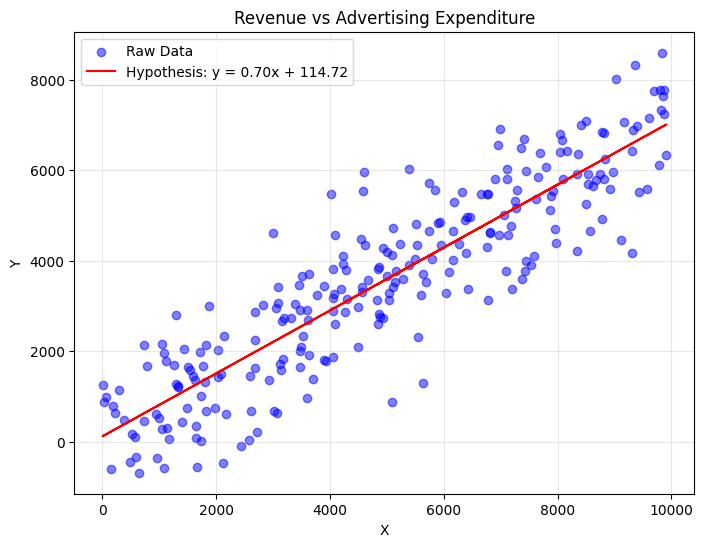

Metrics for Revenue vs Advertising Expenditure:
Mean Squared Error (MSE): 938119.04
Mean Absolute Error (MAE): 777.43
R-squared (R2): 0.80




In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for 3 examples

# Example 1: House prices vs size
np.random.seed(42)
size = np.random.rand(250) * 500  # Size of houses in sqft
price = size * 300 + np.random.randn(250) * 20000  # Price in dollars with noise

# Example 2: Temperature vs ice cream sales
np.random.seed(43)
temperature = np.random.rand(250) * 40 + 20  # Temperature in degrees Celsius
ice_cream_sales = temperature * 200 + np.random.randn(250) * 200  # Sales in dollars

# Example 3: Advertising expenditure vs revenue
np.random.seed(44)
ad_expenditure = np.random.rand(250) * 10000  # Advertising budget in dollars
revenue = ad_expenditure * 0.7 + np.random.randn(250) * 1000  # Revenue in dollars

# Linear regression function using NumPy
def simple_linear_regression(x, y):
    # Add a bias term to X for the intercept
    X = np.vstack((x, np.ones(len(x)))).T
    # Solve for weights w = [slope, intercept] using the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

# Perform linear regression on each dataset
datasets = [
    (size, price, "House Prices vs Size"),
    (temperature, ice_cream_sales, "Ice Cream Sales vs Temperature"),
    (ad_expenditure, revenue, "Revenue vs Advertising Expenditure")
]

# Iterate over datasets
for x, y, title in datasets:
    # Train model
    slope, intercept = simple_linear_regression(x, y)

    # Predict using hypothesis
    y_pred = slope * x + intercept

    # Calculate metrics manually (NumPy)
    mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
    ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    r2 = 1 - (ss_residual / ss_total)  # R-squared

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5, label="Raw Data")
    plt.plot(x, y_pred, color='red', label=f"Hypothesis: y = {slope:.2f}x + {intercept:.2f}")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Display error metrics
    print(f"Metrics for {title}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\n")


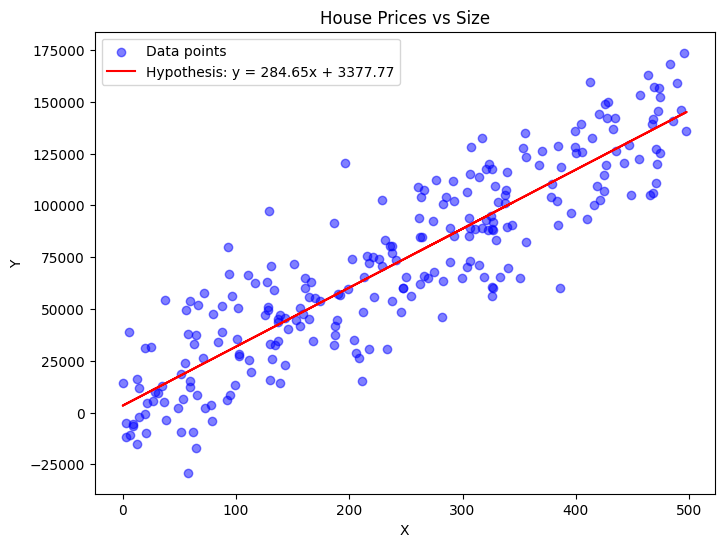

Metrics for 'House Prices vs Size':
Mean Squared Error (MSE): 416643874.55
Mean Absolute Error (MAE): 16613.92
Root Mean Squared Error (RMSE): 20411.86
R-squared (R2): 0.80




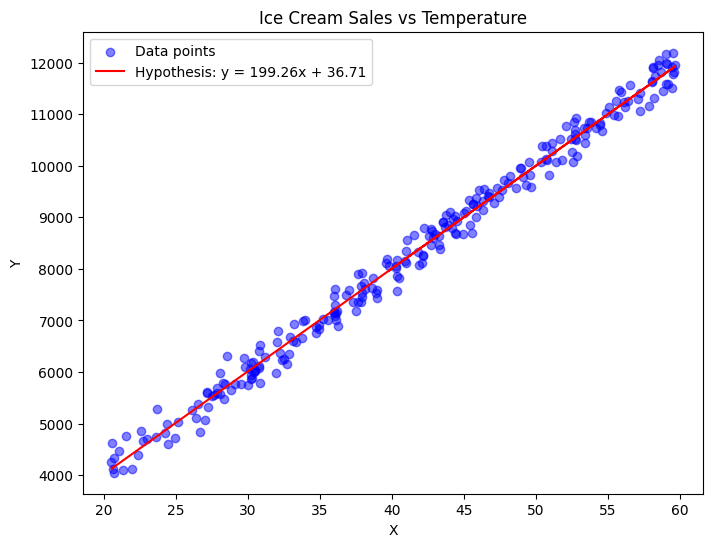

Metrics for 'Ice Cream Sales vs Temperature':
Mean Squared Error (MSE): 45463.98
Mean Absolute Error (MAE): 174.26
Root Mean Squared Error (RMSE): 213.22
R-squared (R2): 0.99




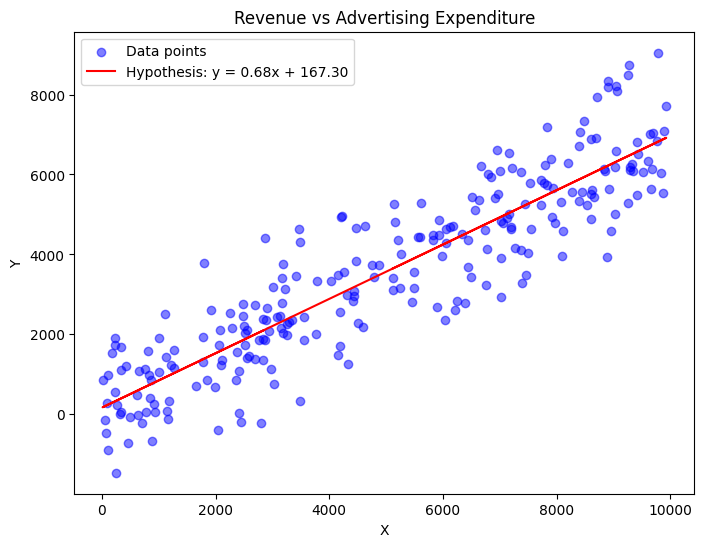

Metrics for 'Revenue vs Advertising Expenditure':
Mean Squared Error (MSE): 975772.02
Mean Absolute Error (MAE): 784.72
Root Mean Squared Error (RMSE): 987.81
R-squared (R2): 0.81




In [17]:
from libs.helper import Helper

helper = Helper()

# Generate some data points along a line with some noise
dataset = [
    helper.create_linear_dataset(title="House Prices vs Size", slope=300, intercept=20000, noise=20000),
    helper.create_linear_dataset(title="Ice Cream Sales vs Temperature", slope=200, x_range=40, x_min=20, intercept=0, noise=200),
    helper.create_linear_dataset(title="Revenue vs Advertising Expenditure", slope=0.7, x_range=10000, intercept=1000, noise=1000)
]

# Iterate over datasets
for x, y, title in dataset:
    # Train model
    slope, intercept = helper.simple_linear_regression(x, y)

    # Predict using hypothesis
    y_pred = helper.get_predictions(x, (slope, intercept))

    # Calculate metrics manually (NumPy)
    mse = helper.mean_squared_error(y, y_pred)  # Mean Squared Error
    mae = helper.mean_absolute_error(y, y_pred)  # Mean Absolute Error
    rmse = helper.root_mean_squared_error(y, y_pred)  # Root Mean Squared Error
    r2 = helper.r_squared(y, y_pred)  # R-squared

    # Plot results
    helper.plot_dataset_with_hypothesis(title, x, y, y_pred, slope, intercept)

    # Display error metrics
    print(f"Metrics for '{title}':")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("\n")


### Code Explanation:
1. **Dataset**:
   - The target variable (house price) is influenced by:
     - Size of the house (\( x_1 \)): Positive correlation.
     - Number of bedrooms (\( x_2 \)): Positive correlation.
     - Distance to city (\( x_3 \)): Negative correlation.

2. **Matrix Representation**:
   - The feature matrix (\( X \)) combines all features, and a bias term is added for the intercept.

3. **Normal Equation**:
   - Weights are computed using:
     \[
     w = (X^T X)^{-1} X^T y
     \]
   Where \( w \) is a vector of coefficients.

4. **Metrics and Visualization**:
   - \( MSE \), \( MAE \), and \( R^2 \) evaluate performance.
   - Plots show the relationship between individual features and the target variable.


[  314.3699276  50204.32075978 -2270.50760791 -2042.283011  ]
Weights (coefficients):
Size (sqft): 314.37
Bedrooms: 50204.32
Distance to city (km): -2270.51
Intercept: -2042.28

Error Metrics:
Mean Squared Error (MSE): 426543849.72
Mean Absolute Error (MAE): 16388.76
R-squared (R2): 0.95


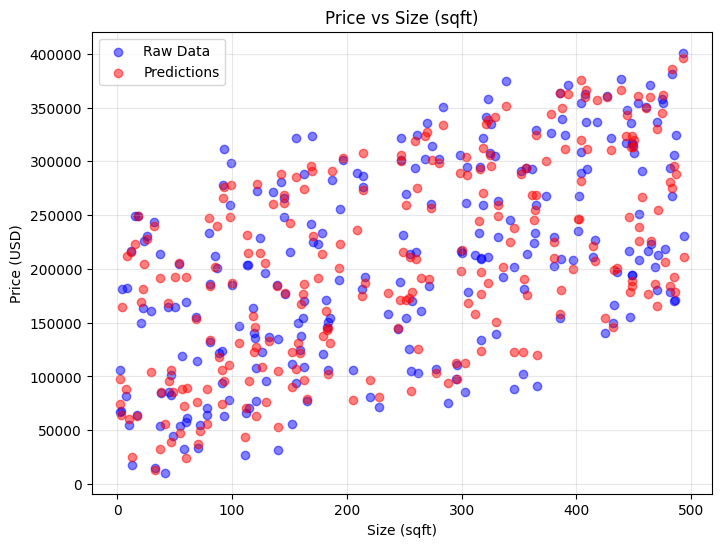

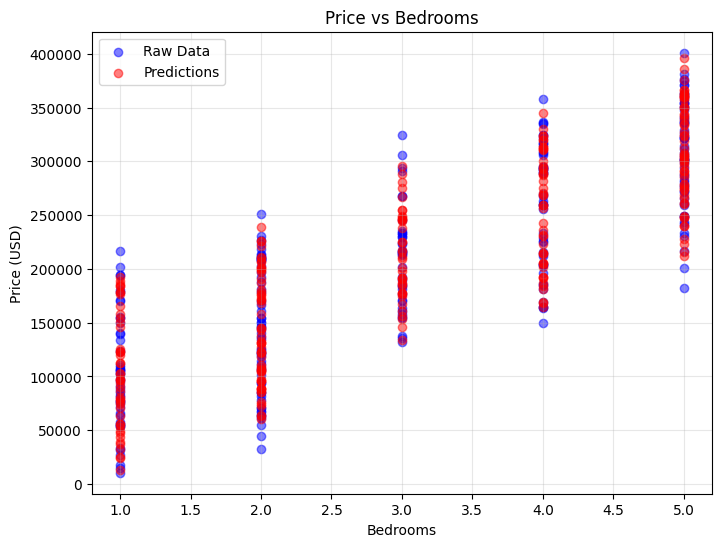

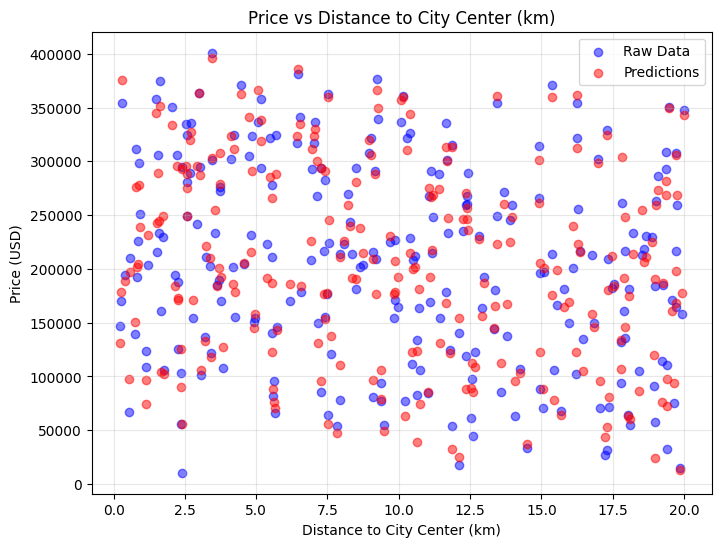

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with multiple features
np.random.seed(42)
num_samples = 250

# Feature 1: House size in sqft
size = np.random.rand(num_samples) * 500

# Feature 2: Number of bedrooms
bedrooms = np.random.randint(1, 6, num_samples)

# Feature 3: Distance to city center (in km)
distance_to_city = np.random.rand(num_samples) * 20

# Target variable: House price
noise = np.random.randn(num_samples) * 20000  # Adding noise
price = (
    size * 300 +          # Effect of size
    bedrooms * 50000 +    # Effect of bedrooms
    distance_to_city * -2000 +  # Effect of distance (negative correlation)
    noise
)

# Combine features into a matrix
X = np.column_stack((size, bedrooms, distance_to_city))
y = price

# Linear regression function with multiple features
def multivariate_linear_regression(X, y):
    # Add a bias term (intercept)
    X_b = np.column_stack((X, np.ones(X.shape[0])))
    # Compute weights using the normal equation
    w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return w

# Train the linear regression model
weights = multivariate_linear_regression(X, y)
print(weights)
slope_size, slope_bedrooms, slope_distance, intercept = weights

# Predict using the model
X_b = np.column_stack((X, np.ones(X.shape[0])))
y_pred = X_b @ weights

# Calculate error metrics
mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total Sum of Squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual Sum of Squares
r2 = 1 - (ss_residual / ss_total)  # R-squared

# Display results
print("Weights (coefficients):")
print(f"Size (sqft): {slope_size:.2f}")
print(f"Bedrooms: {slope_bedrooms:.2f}")
print(f"Distance to city (km): {slope_distance:.2f}")
print(f"Intercept: {intercept:.2f}\n")

print("Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the relationship for each feature against price (only one feature at a time)
features = ["Size (sqft)", "Bedrooms", "Distance to City Center (km)"]
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, alpha=0.5, label="Raw Data", color='blue')
    plt.scatter(X[:, i], y_pred, alpha=0.5, label="Predictions", color='red')
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


### Explanation:
1. **Gradient Descent Algorithm (or Batch Gradient Descent)**:
   - The weights are updated iteratively:
     \[
     \text{weights} = \text{weights} - \text{learning_rate} \times \text{gradient}
     \]
   - The gradient is computed for each feature using the derivative of the loss function.

2. **Learning Rate**:
   - A small learning rate (\(0.000001\)) ensures stable convergence.

3. **Convergence**:
   - The loop runs for 1000 epochs, showing the MSE at every 100 epochs.

4. **Final Results**:
   - After gradient descent, the model provides weights (coefficients) for each feature and evaluates performance metrics (MSE, MAE, \(R^2\)).


Epoch 0: MSE = 49616152322.37
Epoch 6000: MSE = 4052104978.13
Epoch 12000: MSE = 2064391708.53
Epoch 18000: MSE = 1159913268.42
Epoch 24000: MSE = 748327929.14
Epoch 30000: MSE = 561019146.31
Epoch 36000: MSE = 475761155.12
Epoch 42000: MSE = 436938843.14
Epoch 48000: MSE = 419246240.61
Epoch 54000: MSE = 411168627.50

Final Weights (coefficients): [  297.86204979 48315.47511352 -2015.53081951  5851.01199935]

Final Weights (coefficients):
Size (sqft): 297.86
Bedrooms: 48315.48
Distance to city (km): -2015.53
Intercept: 5851.01

Error Metrics:
Mean Squared Error (MSE): 407466570.89
Mean Absolute Error (MAE): 16136.50
R-squared (R2): 0.94


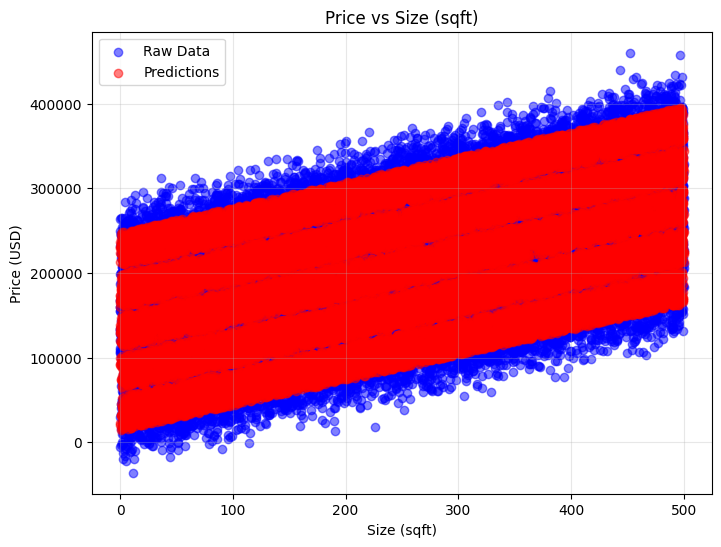

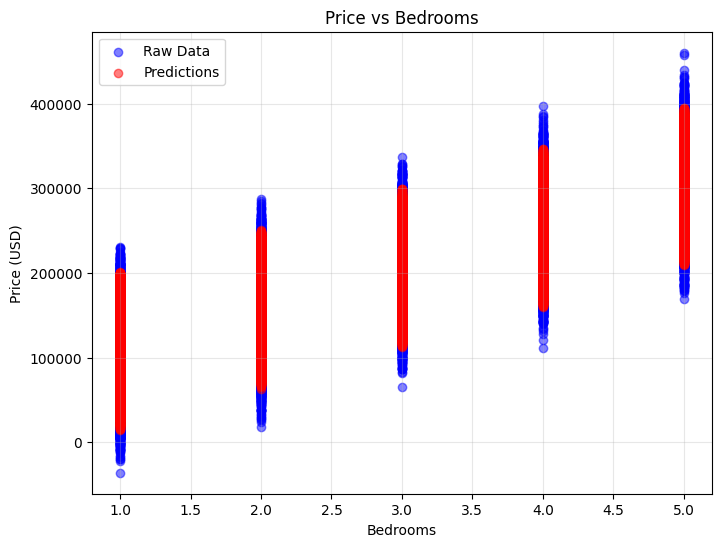

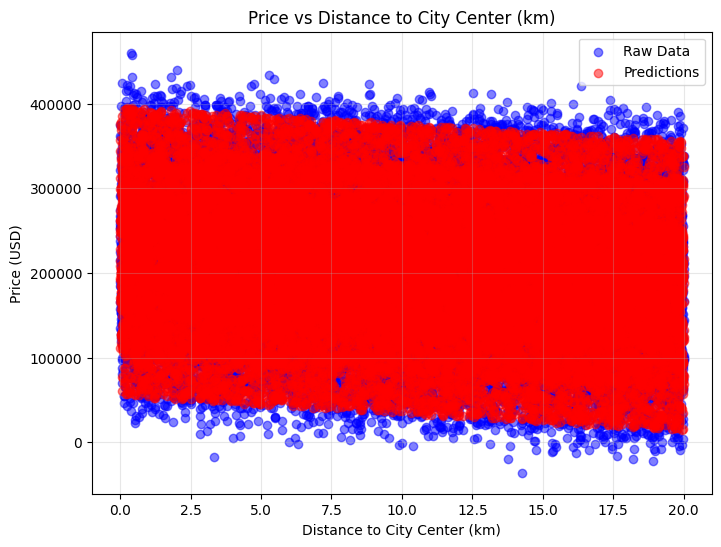

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with multiple features
np.random.seed(42)
num_samples = 25000

# Feature 1: House size in sqft
size = np.random.rand(num_samples) * 500

# Feature 2: Number of bedrooms
bedrooms = np.random.randint(1, 6, num_samples)

# Feature 3: Distance to city center (in km)
distance_to_city = np.random.rand(num_samples) * 20

# Target variable: House price
noise = np.random.randn(num_samples) * 20000  # Adding noise
price = (
    size * 300 +          # Effect of size
    bedrooms * 50000 +    # Effect of bedrooms
    distance_to_city * -2000 +  # Effect of distance (negative correlation)
    noise
)

# Combine features into a matrix
X = np.column_stack((size, bedrooms, distance_to_city))
y = price

# Add a bias term to X
X_b = np.column_stack((X, np.ones(X.shape[0])))

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    # weights = np.zeros(n_features)  # Initialize weights to zeros
    weights = np.random.randn(n_features)  # Initialize weights randomly
    for epoch in range(epochs):
        # Predict
        y_pred = X @ weights
        
        # Calculate gradients
        gradients = -(2 / n_samples) * X.T @ (y - y_pred)
        
        # Update weights
        weights -= learning_rate * gradients
        
        # Optionally, print progress
        if epoch % int(epochs/10) == 0:
            mse = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}: MSE = {mse:.2f}")
    
    return weights

# Train the model
learning_rate = 0.00001 # PLAY AROUND WITH THIS VALUE
epochs = 60000          # PLAY AROUND WITH THIS VALUE
weights = gradient_descent(X_b, y, learning_rate, epochs)

print(f"\nFinal Weights (coefficients): {weights}")

# Extract coefficients
slope_size, slope_bedrooms, slope_distance, intercept = weights

# Predict using the model
y_pred = X_b @ weights

# Calculate metrics
mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # R-squared

# Display results
print("\nFinal Weights (coefficients):")
print(f"Size (sqft): {slope_size:.2f}")
print(f"Bedrooms: {slope_bedrooms:.2f}")
print(f"Distance to city (km): {slope_distance:.2f}")
print(f"Intercept: {intercept:.2f}\n")

print("Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the relationship for each feature against price
features = ["Size (sqft)", "Bedrooms", "Distance to City Center (km)"]
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, alpha=0.5, label="Raw Data", color='blue')
    plt.scatter(X[:, i], y_pred, alpha=0.5, label="Predictions", color='red')
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


### Explanation:
1. **Stochastic Gradient Descent Algorithm**:
   - The weights are updated for each sample:
     \[
     \text{weights} = \text{weights} - \text{learning_rate} \times \text{gradient}
     \]
   - The gradient is computed for each feature using the derivative of the loss function.
2. **Learning Rate**:
   - A small learning rate (\(0.000001\)) ensures stable convergence.
3. **Convergence**:
    - The loop runs for 1000 epochs, showing the MSE at every 100 epochs.
4. **Final Results**:
    - After gradient descent, the model provides weights (coefficients) for each feature and evaluates performance metrics (MSE, MAE, \(R^2\)).

Epoch 0: MSE = 30630506324.16
Epoch 6000: MSE = 7444834519.48
Epoch 12000: MSE = 6402506975.98
Epoch 18000: MSE = 5478091175.90
Epoch 24000: MSE = 4802647812.51
Epoch 30000: MSE = 4091894929.13
Epoch 36000: MSE = 3581550640.23
Epoch 42000: MSE = 3092027415.10
Epoch 48000: MSE = 2705661483.81
Epoch 54000: MSE = 2352192300.71

Final Weights (coefficients):
Size (sqft): 430.97
Bedrooms: 27405.87
Distance to city (km): 414.82
Intercept: 3424.73

Error Metrics:
Mean Squared Error (MSE): 2067604052.27
Mean Absolute Error (MAE): 36161.92
R-squared (R2): 0.76


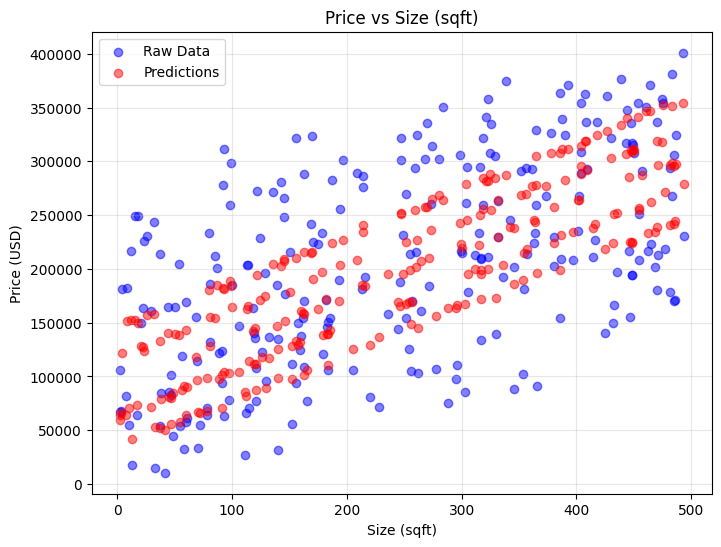

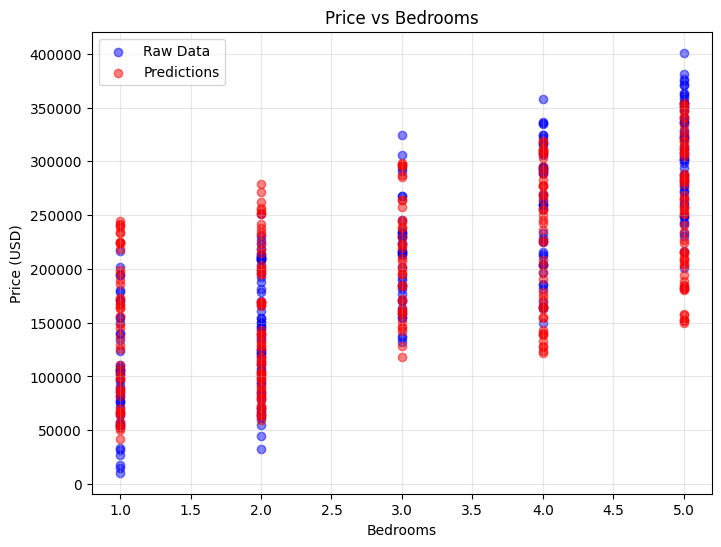

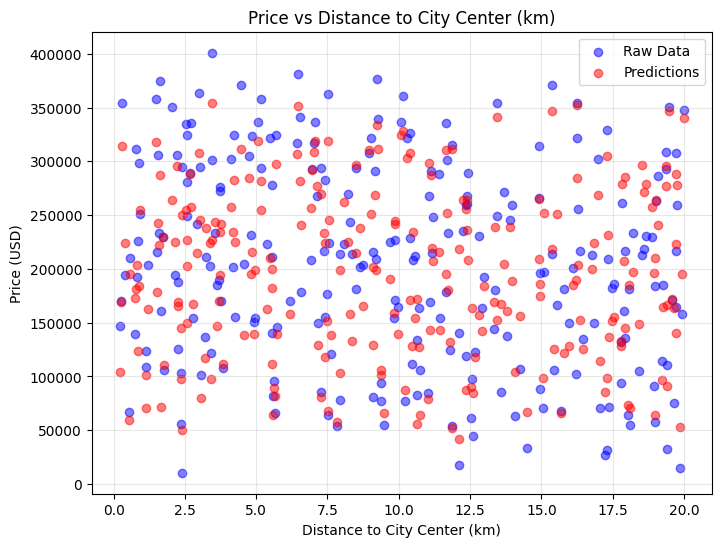

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with multiple features
np.random.seed(42)
num_samples = 250

# Feature 1: House size in sqft
size = np.random.rand(num_samples) * 500

# Feature 2: Number of bedrooms
bedrooms = np.random.randint(1, 6, num_samples)

# Feature 3: Distance to city center (in km)
distance_to_city = np.random.rand(num_samples) * 20

# Target variable: House price
noise = np.random.randn(num_samples) * 20000  # Adding noise
price = (
    size * 300 +          # Effect of size
    bedrooms * 50000 +    # Effect of bedrooms
    distance_to_city * -2000 +  # Effect of distance (negative correlation)
    noise
)

# Combine features into a matrix
X = np.column_stack((size, bedrooms, distance_to_city))
y = price

# Add a bias term to X
X_b = np.column_stack((X, np.ones(X.shape[0])))

# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=50):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zeros

    for epoch in range(epochs):
        for i in range(int(n_samples/5)):
            # Randomly shuffle data to simulate stochastic behavior
            random_index = np.random.randint(0, n_samples)
            x_i = X[random_index]
            y_i = y[random_index]

            # Prediction for a single sample
            y_pred_i = np.dot(x_i, weights)

            # Compute the gradient for the sample
            gradient = -(2 / n_samples) * (x_i * (y_i - y_pred_i))

            # Update weights using the gradient
            weights -= learning_rate * gradient

        # Optionally, calculate and display MSE every epoch
        y_pred = X @ weights
        mse = np.mean((y - y_pred) ** 2)
        if epoch % int(epochs/10) == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}")

    return weights

# Train the model using SGD
learning_rate = 0.00001 # PLAY AROUND WITH THIS VALUE
epochs = 60000          # PLAY AROUND WITH THIS VALUE
weights = stochastic_gradient_descent(X_b, y, learning_rate, epochs)

# Extract coefficients
slope_size, slope_bedrooms, slope_distance, intercept = weights

# Predict using the model
y_pred = X_b @ weights

# Calculate metrics
mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # R-squared

# Display results
print("\nFinal Weights (coefficients):")
print(f"Size (sqft): {slope_size:.2f}")
print(f"Bedrooms: {slope_bedrooms:.2f}")
print(f"Distance to city (km): {slope_distance:.2f}")
print(f"Intercept: {intercept:.2f}\n")

print("Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the relationship for each feature against price
features = ["Size (sqft)", "Bedrooms", "Distance to City Center (km)"]
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, alpha=0.5, label="Raw Data", color='blue')
    plt.scatter(X[:, i], y_pred, alpha=0.5, label="Predictions", color='red')
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


### Explanation:
1. **Mini-Batch Gradient Descent Algorithm**:
   - The weights are updated for a subset of samples:
     \[
     \text{weights} = \text{weights} - \text{learning_rate} \times \text{gradient}
     \]
   - The gradient is computed for each feature using the derivative of the loss function.
2. **Learning Rate**:
    - A small learning rate (\(0.000001\)) ensures stable convergence.
3. **Convergence**:
    - The loop runs for 1000 epochs, showing the MSE at every 100 epochs.
4. **Final Results**:
    - After gradient descent, the model provides weights (coefficients) for each feature and evaluates performance metrics (MSE, MAE, \(R^2\)).

Epoch 0: MSE = 11172222985.50
Epoch 6000: MSE = 4084823309.87
Epoch 12000: MSE = 2073535265.62
Epoch 18000: MSE = 1162909785.17
Epoch 24000: MSE = 759590006.30
Epoch 30000: MSE = 581493593.14
Epoch 36000: MSE = 500442826.64
Epoch 42000: MSE = 462066827.07
Epoch 48000: MSE = 444959234.50
Epoch 54000: MSE = 444972733.99

Final Weights (coefficients):
Size (sqft): 309.65
Bedrooms: 48341.35
Distance to city (km): -2377.53
Intercept: 5421.37

Error Metrics:
Mean Squared Error (MSE): 435025103.49
Mean Absolute Error (MAE): 16758.88
R-squared (R2): 0.95


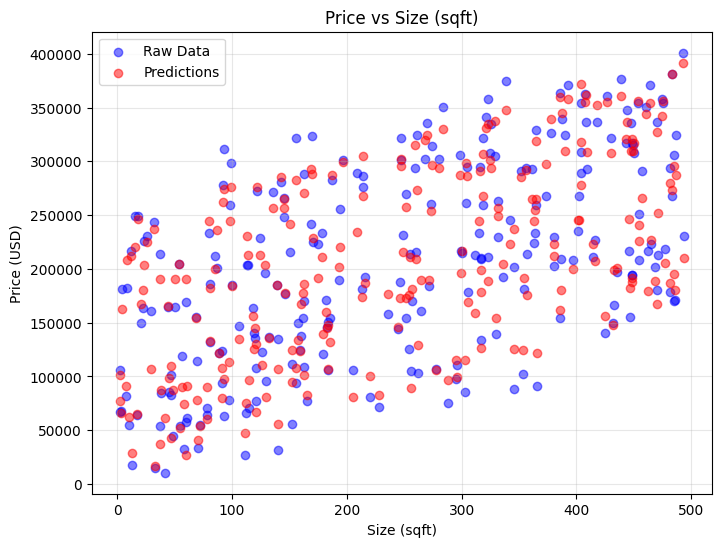

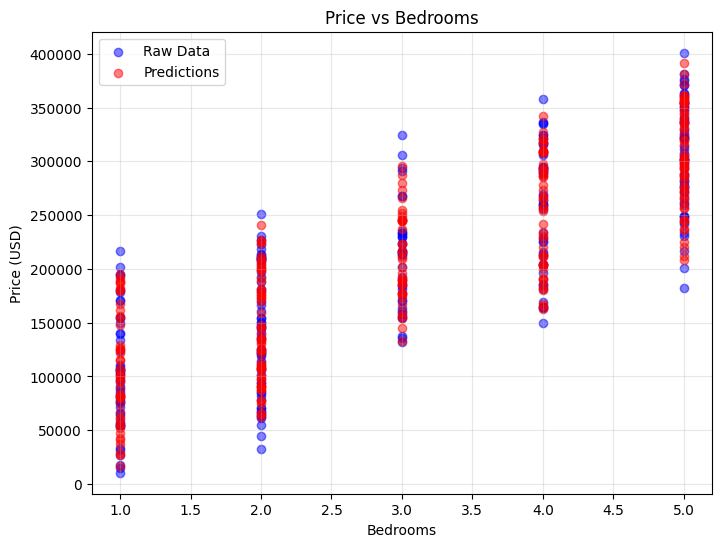

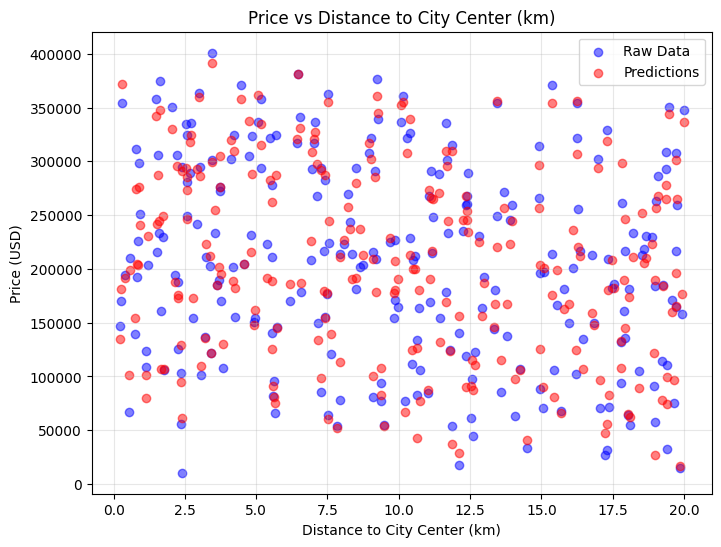

In [21]:
# Mini-batch Gradient Descent Implementation
def minibatch_gradient_descent(X, y, batch_size=5, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zeros

    for epoch in range(epochs):
        for i in range(0, n_samples, batch_size):
            # Randomly shuffle data to simulate stochastic behavior
            indices = np.random.randint(i, i+batch_size, batch_size)
            x_i = X[indices]
            y_i = y[indices]

            # Prediction for a batch of samples
            y_pred_i = x_i @ weights

            # Compute the gradient for the batch
            gradient = -(2 / n_samples) * (x_i.T @ (y_i - y_pred_i))

            # Update weights using the gradient
            weights -= learning_rate * gradient

        # Optionally, calculate and display MSE every epoch
        y_pred = X @ weights
        mse = np.mean((y - y_pred) ** 2)
        if epoch % int(epochs/10) == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}")

    return weights

# Train the model using Mini-batch GD
learning_rate = 0.00001 # PLAY AROUND WITH THIS VALUE
epochs = 60000          # PLAY AROUND WITH THIS VALUE
weights = minibatch_gradient_descent(X_b, y, batch_size=5, learning_rate=learning_rate, epochs=epochs)

# Extract coefficients
slope_size, slope_bedrooms, slope_distance, intercept = weights

# Predict using the model
y_pred = X_b @ weights # Predictions

# Calculate metrics
mse = np.mean((y - y_pred) ** 2)  # Mean Squared Error
mae = np.mean(np.abs(y - y_pred))  # Mean Absolute Error
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # R-squared

# Display results
print("\nFinal Weights (coefficients):")
print(f"Size (sqft): {slope_size:.2f}")
print(f"Bedrooms: {slope_bedrooms:.2f}")
print(f"Distance to city (km): {slope_distance:.2f}")
print(f"Intercept: {intercept:.2f}\n")

print("Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the relationship for each feature against price
features = ["Size (sqft)", "Bedrooms", "Distance to City Center (km)"]
for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, i], y, alpha=0.5, label="Raw Data", color='blue')
    plt.scatter(X[:, i], y_pred, alpha=0.5, label="Predictions", color='red')
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()